In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
dataset = pd.read_csv('train_loan.csv')

In [3]:
# show first 5 rows
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# to see how manny columns and how manny rows are in dataset
dataset.shape

(614, 13)

In [7]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [8]:
dataset[['Gender', 'ApplicantIncome']].groupby(['Gender'], 
                                  as_index = False).mean().sort_values(by = 'Gender', ascending = False)
                                              

,Gender,ApplicantIncome
1,Male,5446.460123
0,Female,4643.473214


In [9]:
dataset[['Gender','Self_Employed','Loan_Status','ApplicantIncome']].groupby(['Gender', 'Self_Employed', 'Loan_Status'],
as_index = False).mean().sort_values(by = 'Gender', ascending = False)

,Gender,Self_Employed,Loan_Status,ApplicantIncome
4,Male,No,N,5853.544715
5,Male,No,Y,4767.390681
6,Male,Yes,N,6130.850000
7,Male,Yes,Y,7565.604651
0,Female,No,N,3863.965517
1,Female,No,Y,4172.366667
2,Female,Yes,N,5915.166667
3,Female,Yes,Y,11094.555556


Data Visualization

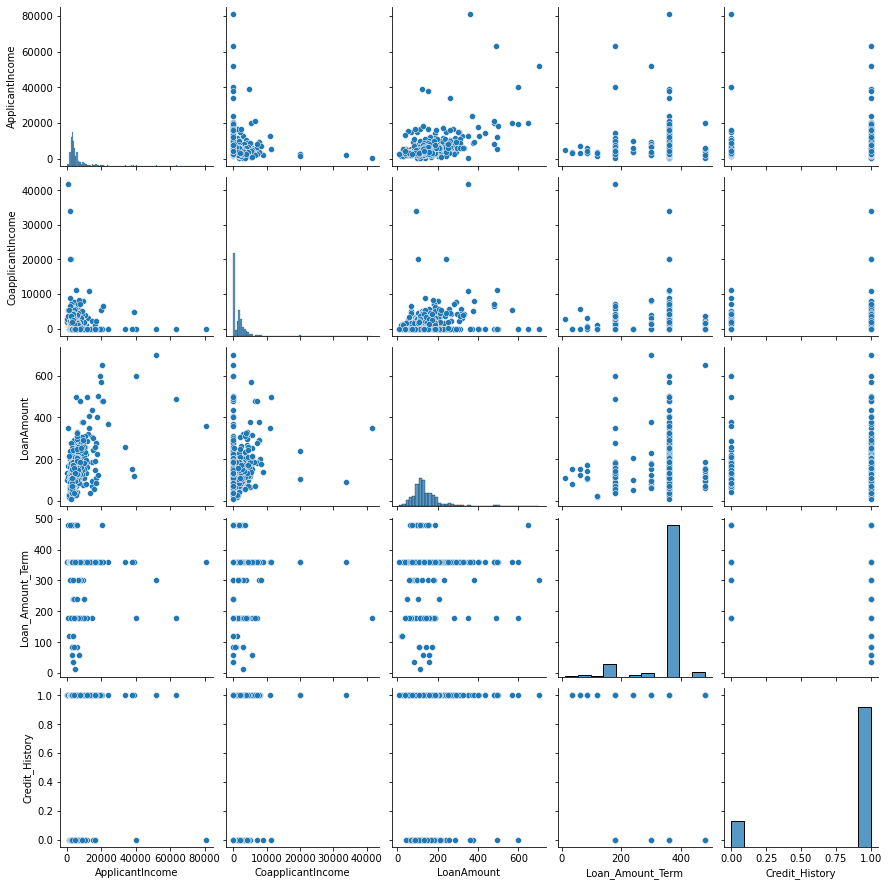

In [10]:
sns.pairplot(dataset)

histograms

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

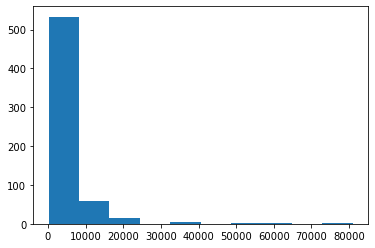

In [11]:
plt.hist('ApplicantIncome', data=dataset)

<AxesSubplot:>

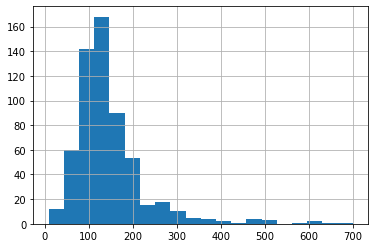

In [12]:
dataset['LoanAmount'].hist(bins=20)

C:\Users\Sangram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sangram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sangram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


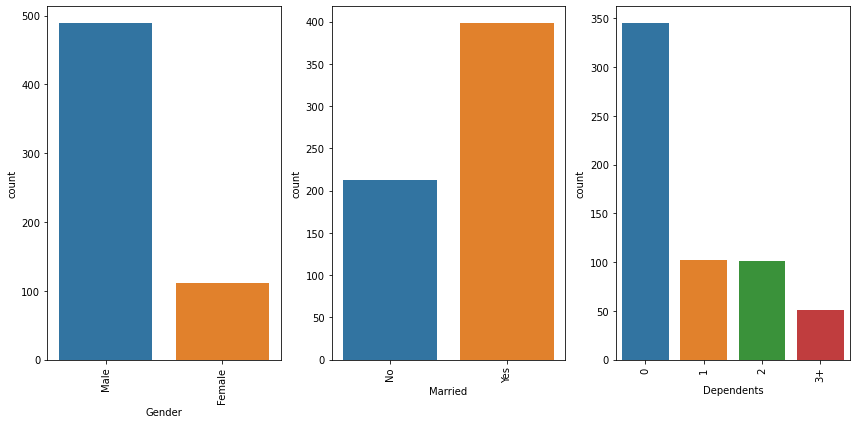

<Figure size 432x288 with 0 Axes>

In [13]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(dataset["Gender"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(dataset["Married"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(dataset["Dependents"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

<AxesSubplot:xlabel='Education', ylabel='count'>

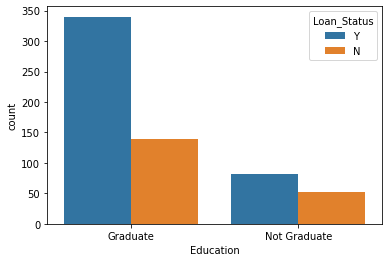

In [14]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

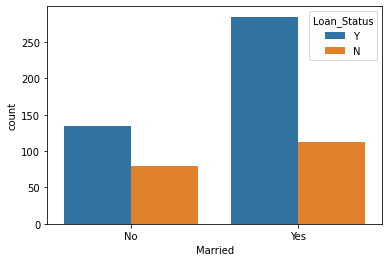

In [15]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=dataset)

<AxesSubplot:xlabel='LoanAmount'>

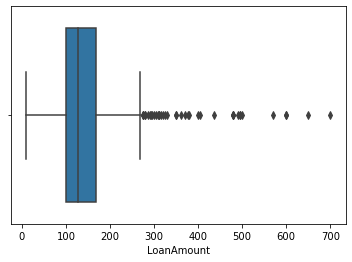

In [16]:
# finding the outliers
sns.boxplot(x=dataset['LoanAmount'])

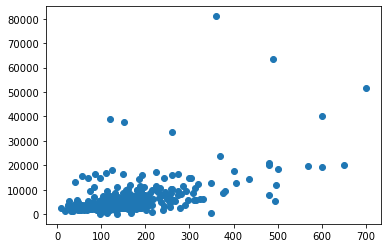

In [20]:
# Relation between ApplicantIncome and Loanamount
plt.scatter(x = dataset['LoanAmount'],y =dataset['ApplicantIncome'])
plt.xlabel = ("LoanAmount") 
plt.ylabel = ('ApplicantIncome')
plt.show()

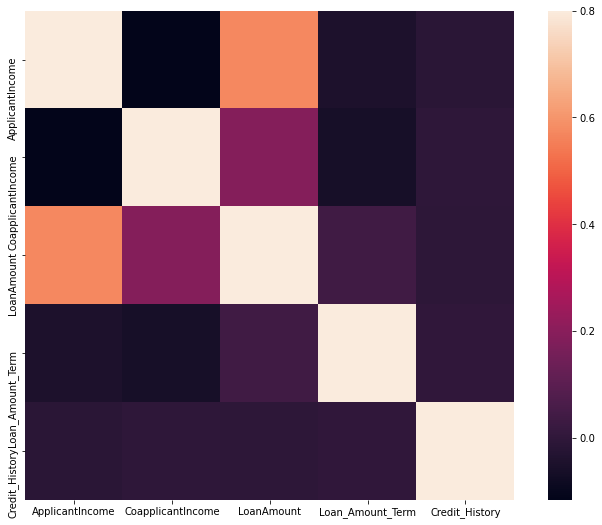

In [18]:
#correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);